# Supplementary data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read activity data
activity = pd.read_csv('activity_data.csv')
activity.head()

,SMILES,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id
0,CCN(C(=O)c1ccco1)C(C(=O)NCCc1cccc(F)c1)c1cccnc1,KHR-WEI-75c61062-1,KHR-WEI-75c61062-1,NaN,NaN,NaN,NaN,NaN,99.500000,NaN,NaN,NaN,NaN,NaN,False,False,Ugi,NaN
1,CN(C(=O)c1ccco1)C(C(=O)NCCc1cccc(F)c1)c1cccnc1,KHR-WEI-75c61062-2,KHR-WEI-75c61062-2,NaN,NaN,NaN,NaN,NaN,99.500000,NaN,NaN,NaN,NaN,NaN,False,False,Ugi,NaN
2,O=C(c1cncc2ccccc12)N1CCN(c2cccc(Cl)c2)CC1,MAT-POS-54c4bf04-3,MAT-POS-54c4bf04-3,NaN,NaN,0.833230,NaN,NaN,1.604578,5.794639,NaN,NaN,NaN,NaN,False,False,NaN,NaN
3,CC1CN(C(=O)c2cc(=O)[nH]c3ccccc23)CCN1c1cccc(Cl)c1,MAT-POS-54c4bf04-4,MAT-POS-54c4bf04-4,NaN,NaN,99.000000,NaN,NaN,14.744381,4.831373,NaN,NaN,NaN,NaN,False,False,quinolones,NaN
4,O=C(Cc1cncc2ccccc12)N1CCOc2ccc(Cl)cc21,JOH-UNI-ea1df7a8-1,JOH-UNI-ea1df7a8-1,NaN,NaN,3.655766,NaN,NaN,6.047252,5.218442,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN


## Correlations

,r_inhibition_at_50_uM,f_inhibition_at_50_uM
r_inhibition_at_50_uM,1.000000,0.660892
f_inhibition_at_50_uM,0.660892,1.000000


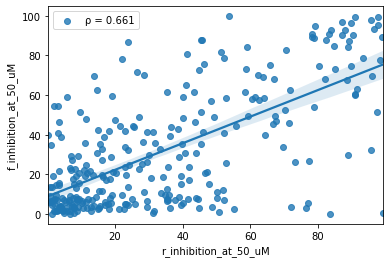

In [3]:
tmp = activity.query('r_inhibition_at_50_uM > 0 and r_inhibition_at_50_uM < 100 \
    and f_inhibition_at_50_uM > 0 and f_inhibition_at_50_uM < 100')
cor = tmp[['r_inhibition_at_50_uM','f_inhibition_at_50_uM']].corr()
sns.regplot(data=tmp, x='r_inhibition_at_50_uM', y='f_inhibition_at_50_uM', label=f'ρ = {cor.iloc[0,1]:.3f}')
plt.legend()
plt.savefig('figures/reg_inhibition_at_50_uM.png')
cor

In [4]:
import pingouin as pg

# Robust correlation ("shepherd" method)
pg.corr(tmp['r_inhibition_at_50_uM'], tmp['f_inhibition_at_50_uM'], method='shepherd')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,288,12,0.635396,"[0.56, 0.7]",0.403728,0.399544,1.297694e-32,1.0


,r_inhibition_at_20_uM,f_inhibition_at_20_uM
r_inhibition_at_20_uM,1.000000,0.827887
f_inhibition_at_20_uM,0.827887,1.000000


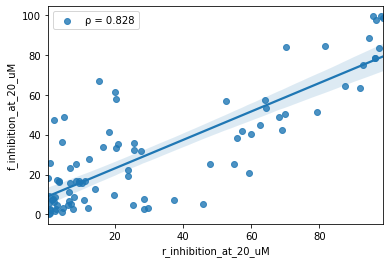

In [5]:
tmp = activity.query('r_inhibition_at_20_uM > 0 and r_inhibition_at_20_uM < 100 \
    and f_inhibition_at_20_uM > 0 and f_inhibition_at_20_uM < 100')
cor = tmp[['r_inhibition_at_20_uM','f_inhibition_at_20_uM']].corr()
sns.regplot(data=tmp, x='r_inhibition_at_20_uM', y='f_inhibition_at_20_uM', label=f'ρ = {cor.iloc[0,1]:.3f}')
plt.legend()
plt.savefig('figures/reg_inhibition_at_20_uM.png')
cor

,r_avg_IC50,f_avg_IC50
r_avg_IC50,1.00000,0.79264
f_avg_IC50,0.79264,1.00000


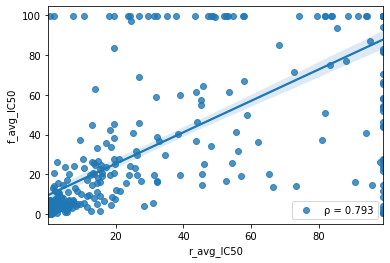

In [6]:
tmp = activity.query('r_avg_IC50 > 0 and r_avg_IC50 < 100 \
    and f_avg_IC50 > 0 and f_avg_IC50 < 100')
cor = tmp[['r_avg_IC50','f_avg_IC50']].corr()
sns.regplot(data=tmp, x='r_avg_IC50', y='f_avg_IC50', label=f'ρ = {cor.iloc[0,1]:.3f}')
plt.legend()
plt.savefig('figures/reg_avg_IC50.png')
cor